In [1]:
from skimage.color import rgb2gray
import numpy as np
import numpy.ma as ma
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from nanofilm.ndimage import imread

In [2]:
from sklearn.cluster import KMeans

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
from sklearn.cluster import spectral_clustering

In [2]:
path_test_map = './data_demo/Flakesearch_Graphene_20180214175340935_087.png'

In [3]:
test_map = imread(path_test_map)

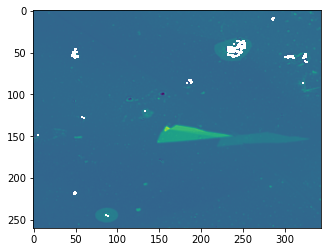

In [11]:
plt.imshow(test_map.T)

In [33]:
#aquí limpiamos los NaN y los sustituimos por la media de todo el mapa
#si hacemos .mean(axis=0) hace la media solo de la columna donde está el NaN

import numpy.ma as ma
map_clean = np.where(np.isnan(test_map), ma.array(test_map, mask=np.isnan(test_map)).mean(), test_map)    


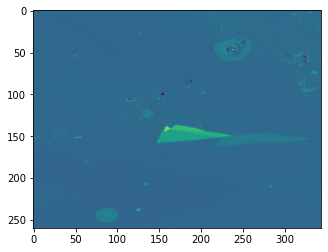

In [31]:
plt.imshow(map_clean.T)

Convertimos el limpiador en una función porque lo tendremos que aplicar muchas veces más adelante

In [4]:
def clean_nan(nparray):
    nparray = np.where(np.isnan(nparray), 
                       ma.array(nparray, 
                                mask=np.isnan(nparray)).mean(), 
                       nparray)
    return nparray

Test para comprobar que la función funciona como debe

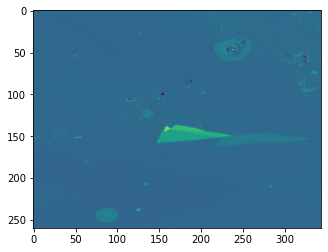

In [5]:
map2 = clean_nan(test_map)
plt.imshow(map2.T)

# Probando segmentación propia de scikit-image

In [6]:
accurion = clean_nan(test_map)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)

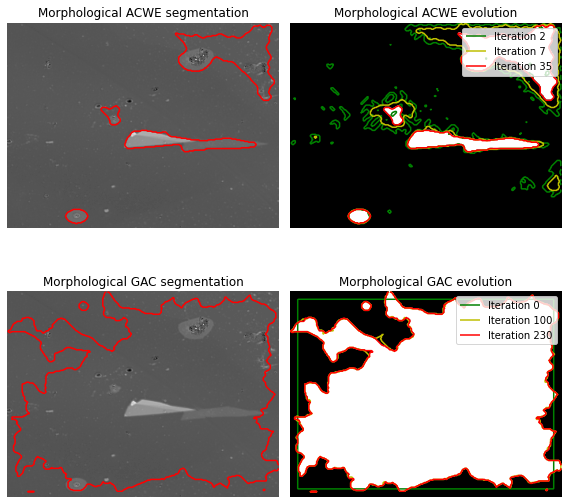

In [40]:
def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE
image = accurion.T

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, 20, init_level_set=init_ls, smoothing=3,
                             lambda1=1,
                             lambda2=1,
                             iter_callback=callback)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)


# Morphological GAC
image = accurion.T
gimage = inverse_gaussian_gradient(image)

# Initial level set
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_geodesic_active_contour(gimage, 230, init_ls,
                                           smoothing=1, balloon=-1,
                                           threshold=0.69,
                                           iter_callback=callback)

ax[2].imshow(image, cmap="gray")
ax[2].set_axis_off()
ax[2].contour(ls, [0.5], colors='r')
ax[2].set_title("Morphological GAC segmentation", fontsize=12)

ax[3].imshow(ls, cmap="gray")
ax[3].set_axis_off()
contour = ax[3].contour(evolution[0], [0.5], colors='g')
contour.collections[0].set_label("Iteration 0")
contour = ax[3].contour(evolution[100], [0.5], colors='y')
contour.collections[0].set_label("Iteration 100")
contour = ax[3].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 230")
ax[3].legend(loc="upper right")
title = "Morphological GAC evolution"
ax[3].set_title(title, fontsize=12)

fig.tight_layout()
plt.show()

In [32]:
def print_info(image):
    max_=np.max(image)
    min_=np.min(image)
    mean_=np.mean(image)
    
    return print (f'max value ={max_} ---- min value ={min_} ---- average ={mean_}')

In [36]:
print_info(map2)

max value =267.7642517089844 ---- min value =161.290771484375 ---- average =198.00186157226562
